In [1]:
# Import packages
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use ('ggplot')

In [2]:
#remove_cell

quandl.ApiConfig.api_key = 'Jck1Cs6gitLAtbxxe-zF'


In [3]:
# Extracting data from Quandl

df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [4]:
df = df[['Adj. Open', 'Adj. High','Adj. Low', 'Adj. Close', 'Adj. Volume' ]]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

df.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [5]:
forecast_col = 'Adj. Close'

In [6]:
df.fillna('-99999', inplace = True)

In [7]:
import math
forecast_out = int(math.ceil(0.02*len(df)))

In [8]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [9]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  89.972737
2004-08-20   54.322689  0.710922    7.227007   22834300.0  90.805307
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  91.271747
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  90.258620
2004-08-25   53.164113  1.886792    1.183658    9188600.0  89.977753


In [10]:
df.dropna(inplace = True)
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,89.972737
2004-08-20,54.322689,0.710922,7.227007,22834300.0,90.805307
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,91.271747
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,90.258620
2004-08-25,53.164113,1.886792,1.183658,9188600.0,89.977753


In [11]:
x  = np.array(df.drop(['label'], 1))   # features
y = np.array(df['label'])

In [12]:
x = preprocessing.scale(x)

In [13]:
print(len(x), len(y))

3355 3355


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [15]:
### Pickling and Scaling the classifier. Here we are running the pickeled code.

# clf = LinearRegression()
# clf.fit(x_train, y_train)
# with open('linearregression.pickle', 'wb') as f:
#     pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [16]:
accuracy = clf.score(x_test, y_test)
print(accuracy)
print(forecast_out)

0.9593871003879253
69


In [17]:
clf2 = svm.SVR()
clf2.fit(x_train, y_train)
accuracy = clf2.score(x_test, y_test)
print(accuracy)

0.7891660943054916


In [18]:
x = x[:-forecast_out]
x_lately = x[-forecast_out:]

In [19]:
forecast_set = clf.predict(x_lately)
print(forecast_set, accuracy, forecast_out)

[1032.57347327 1034.34474861 1042.33616508 1050.26442779 1042.52768107
 1048.13737768 1051.06487986 1013.45776454 1005.7628249  1015.41063998
 1012.72092363 1004.63207424 1003.42660738 1020.43769354 1013.81630956
 1024.19181685 1022.29478389 1031.83438621 1016.54017629  991.43999925
 1005.32572549  981.09724655  972.77211121  962.29993238  975.55048698
  970.6504174   984.47453066  995.3125942   998.28522003 1012.69319864
 1013.45562245 1022.73180024 1021.11591511 1032.29066498 1038.92090525
 1038.30953194 1040.07868888 1043.74757899 1012.94202546 1010.12607997
  996.07261163 1002.64727102  989.16218758  990.66886077  992.19222803
  984.38258393  990.32531763  990.25786586  988.06172815  984.17804508
  966.45458769  973.56286121  983.27161559  982.2716331   988.28470745
  970.76488109  969.74968149  964.1842546   984.07520731  986.72812238
  980.72394661  974.11309175  971.80116119  979.1822341   987.77008794
  999.6753241   996.69567553  985.32935684  986.46609369] 0.7891660943054916 

In [20]:
df['forecast'] = np.nan

In [21]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [22]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
print(df.tail())

                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2018-02-17 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-02-18 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-02-19 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-02-20 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-02-21 01:00:00         NaN     NaN         NaN          NaN    NaN   

                       forecast  
Date                             
2018-02-17 01:00:00  987.770088  
2018-02-18 01:00:00  999.675324  
2018-02-19 01:00:00  996.695676  
2018-02-20 01:00:00  985.329357  
2018-02-21 01:00:00  986.466094  


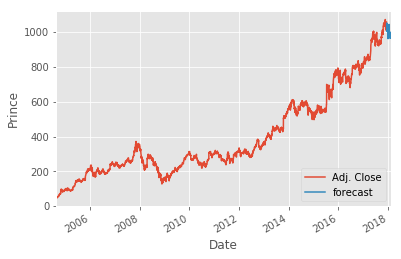

In [23]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Prince')
plt.show()